In [ ]:
'''
The renderer we use is for meshes. 
There is also the option to work with Point clouds as input
I do not think there is a need for that but I implemented an initial version of it!

'''

In [114]:
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Util function for loading point clouds|
import numpy as np

# Data structures and functions for rendering
from pytorch3d.structures import Pointclouds
from pytorch3d.io import load_obj, save_obj, load_ply,load_objs_as_meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVOrthographicCameras, 
    PointsRasterizationSettings,
    PointsRenderer,
    PulsarPointsRenderer,
    PointsRasterizer,
    AlphaCompositor,
    NormWeightedCompositor
)

import trimesh

In [140]:
path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/S3DIS_examples/Area_3_conferenceRoom_1.ply"

mesh_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Office_chair/10239_Office_Chair_v1_L3.obj"
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"

device = "cuda:0"

In [144]:
pointcloud =trimesh.load(path_liberty, force = "mesh")

primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL

In [147]:
verts = torch.Tensor(pointcloud.vertices).to(device)
        
rgb = torch.Tensor(pointcloud.visual.vertex_colors[:,0:3]).to(device)


center = verts.mean(0)
verts = verts - center
scale = max(verts.abs().max(0)[0])
verts = verts / scale


point_cloud = Pointclouds(points=[verts], features=[rgb])

In [168]:
R, T = look_at_view_transform(5, 0, 45)
cameras = FoVOrthographicCameras(device=device, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. Refer to raster_points.py for explanations of these parameters. 
raster_settings = PointsRasterizationSettings(
    image_size=512, 
    radius = 0.005,
    points_per_pixel = 10
)


# Create a points renderer by compositing points using an alpha compositor (nearer points
# are weighted more heavily). See [1] for an explanation.
rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
renderer = PointsRenderer(
    rasterizer=rasterizer,
    compositor=AlphaCompositor(background_color=(1,0,1))
)

In [169]:
images = renderer(point_cloud)

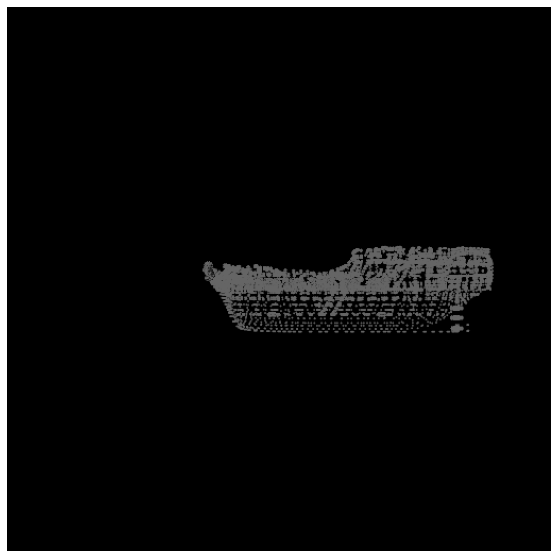

In [172]:
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy()/255)
plt.axis("off");

In [ ]:
# Try mesh with the point renderer
